In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
!pip install rembg
import cv2
import numpy as np
from matplotlib import pyplot as plt
from rembg import remove
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/MyDrive/Project/TOMATO PROJECT/tomato

Mounted at /content/drive


In [ ]:
# Define our imshow function
def imshow(title = "Image", image = None, size = 4):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [ ]:
# Define our emove_background_advanced function
def remove_background_advanced(input_path, output_path, alpha_matte=False, background_color=(255, 255, 255)):
    with open(input_path, "rb") as input_file, open(output_path, "wb") as output_file:
        input_data = input_file.read()

        # Use advanced options
        output_data =remove(input_data, alpha_matte=alpha_matte, background_color=background_color)
        output_file.write(output_data)

In [ ]:
# import time
# %cd /content/sample_data
# ldseg=np.array(os.listdir('Fresh'))
# time.sleep(3)
# len(ldseg)

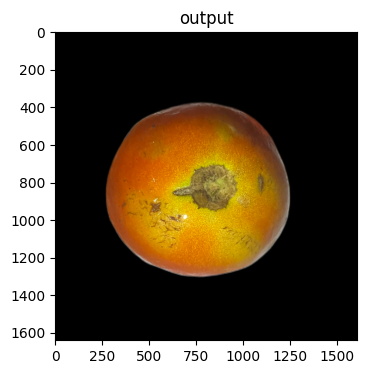

In [39]:
input_path ="/content/drive/MyDrive/Project/TOMATO PROJECT/tomato/image_16.jpg"
output_image= "output_image_advanced.jpg"
input = cv2.imread(input_path)
remove_background_advanced(input_path, output_image, alpha_matte=True, background_color=(0, 0, 0))
output = cv2.imread("output_image_advanced.jpg")
imshow('output', output)

482
17396.0
562.357426404953


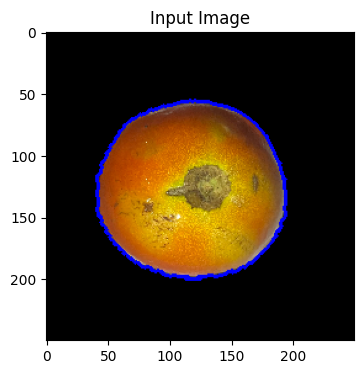

In [43]:
image =cv2.resize(output, (250, 250), interpolation = cv2.INTER_LINEAR)
copy = image.copy()
imgu_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

lower= np.array([10,10])
upper= np.array([255,255])

#mask = cv2.inRange(imgu_hsv, lower, upper)
_, th2 = cv2.threshold(imgu_hsv, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#only convert to background to black
#invert=cv2.bitwise_not(th2)

contours, hierarchy = cv2.findContours(imgu_hsv,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE )
cont_img=cv2.drawContours(imgu_hsv, contours, -1, 255, 3)


c = max(contours,key=cv2.contourArea)
x,y,w,h=cv2.boundingRect(c)

x1=x
x2=x1+w
y1=y
y2=y1+h
rect = (x1,y1,x2-x1,y2-y1)
copy_1= copy.copy()
copy_2= copy.copy()
print(len(c))
# Calculate area of the largest contour
tomato_area = cv2.contourArea(c)
perimeter = cv2.arcLength(c, True)
print(tomato_area)
print(perimeter)
# Draw the contour and area on the image
cv2.rectangle(copy_1, (x,y), (x+w,y+h), (255,0,255), 2)

# Draw the contour and area on the image
cv2.drawContours(copy, c, -1, (255, 0, 0), 2)

# imshow('mask 0', imgu_hsv)
# imshow('mask 0', th2)
# imshow('mask 0', cont_img)
# imshow("Input Image", copy_1)
imshow("Input Image", copy)

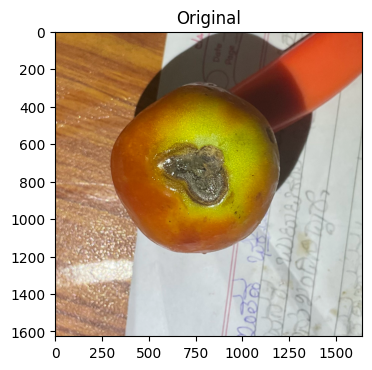

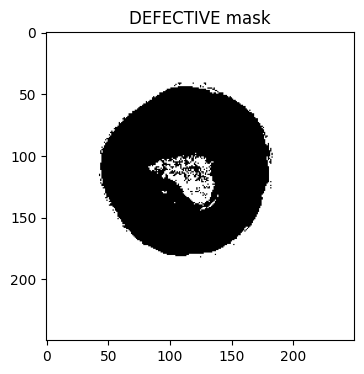

In [34]:
img_hsv = cv2.cvtColor(copy_2 ,cv2.COLOR_BGR2HSV)

# lower mask RED
lower_red0 = np.array([0,40,40])
upper_red0 = np.array([17,255,255])
mask0 = cv2.inRange(img_hsv, lower_red0, upper_red0)

# upper mask RED
lower_red1 = np.array([170,10,10])
upper_red1 = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)

red_mask = mask0+mask1
red_part = cv2.bitwise_and(image, image, mask=red_mask)

# mask GREEN
lower_green = np.array([35,10,10])
upper_green = np.array([75,255,255])
green_mask = cv2.inRange(img_hsv, lower_green, upper_green)
green_part = cv2.bitwise_and(image, image, mask=green_mask)

# mask YELLOW
lower_yellow = np.array([20,110,10])
upper_yellow = np.array([35,255,255])
yellow_mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
yellow_part = cv2.bitwise_and(image, image, mask=yellow_mask)

# mask DEFECTIVE
lower_gray = np.array([0, 0, 0])
upper_gray = np.array([180, 90, 255])
mask = cv2.inRange(img_hsv, lower_gray, upper_gray)
Defective = cv2.bitwise_and(image, image, mask=mask)


imshow('Original', input)
#imshow('mask_0', mask0)
#imshow('mask_1', mask1)
#imshow('RED mask', red_mask)
#imshow('Red Area', red_part)
#imshow('GREEN mask', green_mask)
#imshow('green part ', green_part)
#imshow('YELLOW mask', yellow_mask)
#imshow('YELLOW part ', yellow_part)
imshow('DEFECTIVE mask', mask)
#imshow('DEFECTIVE part', Defective)